In [842]:
import numpy as np
import matplotlib.pyplot as plt
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR

from PIL import Image


In [843]:
def plot (arr_in):
    plt.imshow(arr_in, 'Greys')
    plt.show()

In [844]:
def outer_product_3d(matrix1, matrix2):
    # Reshape matrix1 to (m, n, 1) and matrix2 to (1, p, q)
    return matrix1[:, :, np.newaxis] * matrix2[np.newaxis, :, :]

In [845]:
class neuron ():
    def __init__(self, size) -> None:
        self.weights = np.random.rand(size)
        self.output = np.random.random(1)
        pass

    def __repr__(self) -> str:
        return f"Weights = {self.weights} \n\
            Current state = {self.output}"


first_neuron = neuron(10)
print(first_neuron)

Weights = [0.56183871 0.90790282 0.49934115 0.14758302 0.39078073 0.11836479
 0.48438791 0.54377875 0.69536187 0.85380013] 
            Current state = [0.39087835]


In [846]:
class hopfield (): 
    def __init__(self, shape) -> None:
        # Set weights to range [-1,1)
        
        self.input_weights = np.identity(shape[1]) * 1 #np.full((shape[0], shape[1]), 1.0)
        self.internal_weights = np.random.rand(shape[0], shape[0], shape[0])
        #Avoid self-feedback
        np.fill_diagonal(self.internal_weights, 0)
        self.outputs = np.random.rand(shape[0],shape[1])*2 -1 
        self.learning_rate = 0.01
        self.hebb = np.zeros((shape[0], shape[0], shape[0]))

    def __repr__(self) -> str:
        return f"Internal weights: {self.internal_weights}\n\n\
            Current state: {self.outputs}"

    def update (self, input):
        #Behold! ReLU
        # print(f"Input shape: {input.shape}")
        # print(f"Input weights shape: {self.input_weights.shape}")
        input_activation = self.input_weights @ input

        # print(f"Internal weights shape: {self.internal_weights.shape}")
        # print(f"Ouputs shape: {self.outputs.shape}")
        self_activation = np.einsum('ijk,ij->ij', self.internal_weights, self.outputs)

        new_outputs =  input_activation + self_activation
        # print(f"New outputs: {new_outputs}")
        
        
        # hebb = new_outputs @ self.outputs.T #@ new_outputs.T #new_outputs @ self.outputs.T'
        self.hebb = outer_product_3d(new_outputs, new_outputs)
        # print(f"hebb shape: {self.hebb.shape}")
        self.internal_weights += self.hebb * self.learning_rate * -1
        # np.fill_diagonal(self.internal_weights, 0)
        
        self.internal_weights = np.clip(self.internal_weights, 0, None)
        self.input_weights = self.input_weights * 0.99

        self.outputs = np.clip(self.outputs, -1, 1)

    def visualize_weights (self):
        plt.imshow(self.internal_weights, 'Greys')

    def visualize_outputs (self):
        plt.imshow(self.outputs, 'Greys')

hop = hopfield([10,10])
# print(hop)
# hop.visualize_weights()

/tmp/ipykernel_7585/3946843270.py:3: RuntimeWarning: overflow encountered in multiply
  return matrix1[:, :, np.newaxis] * matrix2[np.newaxis, :, :]


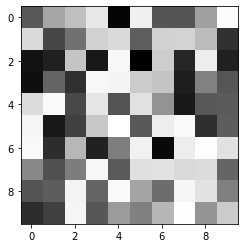

In [847]:
for i in range (0, 100):
    hop.update(smily)
# hop.visualize_weights()
# print(f"Current weights: {hop.internal_weights}")
hop.visualize_outputs()
    
    

In [848]:
print(hop.internal_weights)
print(hop.hebb)

[[[inf  0.  0.  0. inf  0. inf inf  0.  0.]
  [inf  0.  0. inf inf  0. inf inf inf  0.]
  [ 0.  0. inf  0. inf  0. inf  0. inf  0.]
  [ 0.  0.  0. inf inf inf inf  0.  0.  0.]
  [ 0.  0. inf  0. inf  0. inf inf inf inf]
  [inf  0.  0. inf inf  0. inf inf  0.  0.]
  [ 0. inf  0. inf inf  0. inf  0.  0.  0.]
  [inf inf inf  0. inf  0.  0.  0.  0. inf]
  [ 0.  0. inf  0. inf inf  0. inf inf  0.]
  [ 0.  0. inf  0. inf  0. inf inf  0. inf]]

 [[ 0. inf inf inf  0. inf  0.  0. inf inf]
  [ 0. inf inf  0.  0. inf  0.  0.  0. inf]
  [inf inf  0. inf  0. inf  0. inf  0. inf]
  [ 0.  0.  0. inf inf inf inf  0.  0.  0.]
  [inf inf  0. inf  0. inf  0.  0.  0.  0.]
  [ 0. inf inf  0.  0. inf  0.  0. inf inf]
  [inf  0. inf  0.  0. inf  0. inf inf inf]
  [ 0.  0.  0. inf  0. inf inf inf inf  0.]
  [ 0.  0. inf  0. inf inf  0. inf inf  0.]
  [inf inf  0. inf  0. inf  0.  0. inf  0.]]

 [[inf  0.  0.  0. inf  0. inf inf  0.  0.]
  [ 0. inf inf  0.  0. inf  0.  0.  0. inf]
  [ 0.  0. inf  0. inf  0. i

In [849]:
print(hop.input_weights)

[[0.36603234 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.36603234 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.36603234 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.36603234 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.36603234 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.36603234
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.36603234 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.36603234 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.36603234 0.        ]
 [0.         0.         0.   

## Reconstruction
If the network has been successfully trained, it will re-form the learned pattern after distortion of state

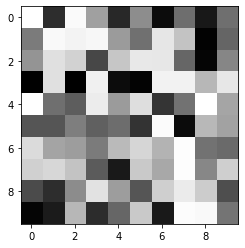

In [850]:
hop.outputs = np.random.rand(10,10)
new_inputs = np.zeros((10,10))

hop.visualize_outputs()

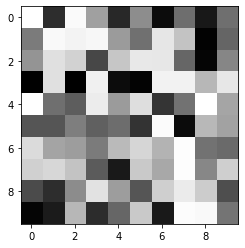

In [851]:
for i in range (0,1):
    hop.update(new_inputs)
    hop.visualize_outputs()